Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [2]:
import numpy as np
from scipy import stats

In [3]:

z = (9.57-9.5)/( 0.4 / np.sqrt(160)) # статистика 
print z, 2*(1-stats.norm.cdf(z)) # вывод статистики и площади 2х "хвостов"

2.213594362117875 0.026856695507523787


Имеются данные о стоимости и размерах 53940 бриллиантов:

diamonds.txt
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [4]:
import pandas as pd
data = pd.read_csv("diamonds.txt",sep='\t')

In [5]:
data.head()

X = data.drop('price', 1)
y = data['price']

In [6]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X,y,test_size=0.25,random_state=1)

In [9]:
 reg_lin = LinearRegression().fit(X_train, y_train)

In [10]:
y_pred_lin = reg_lin.predict(X_test)

In [11]:
reg_forest = RandomForestRegressor(random_state=1).fit(X_train, y_train)
y_pred_forest = reg_forest.predict(X_test) 

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
print mean_squared_error(y_test, y_pred_lin)
print mean_squared_error(y_test, y_pred_forest)  

2140750.1376284976
1974973.2160511552


In [13]:
delta_LR = np.abs(y_pred_lin - y_test)
delta_RF = np.abs(y_pred_forest - y_test)

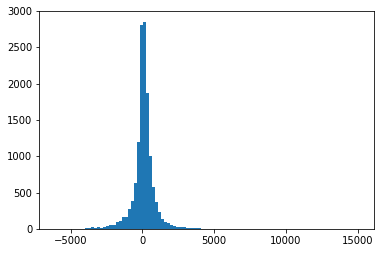

In [72]:
plt.hist(delta_LR-delta_RF,bins=100) # убеждаемся что распределение нормальное (так как Шапиро-Уилка ругается на N>5000)
plt.show()

In [81]:
print stats.ttest_rel(delta_LR,delta_RF) 

Ttest_relResult(statistic=13.017729783879593, pvalue=1.6551745751192542e-38)


Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05? - отвергается.

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [14]:
from statsmodels.stats.weightstats import *

In [19]:
v = (delta_LR-delta_RF)
#print _tconfint_generic(v.mean(),v.std(ddof=1)/np.sqrt(len(v)),len(v) - 1, 0.05, "two-sided")

#print  _tconfint_generic(m_south_mean, m_south_std,len(data_south)-1, 0.05, 'two-sided')                  


In [20]:
print "95%% confidence interval: [%f, %f]" % DescrStatsW(v).tconfint_mean()

95% confidence interval: [74.287245, 100.624521]
